# Image Preprocessing for Sheep Detection
This notebook processes thermal or infrared images to make sheep more visible through various enhancement techniques.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image and Convert to Grayscale

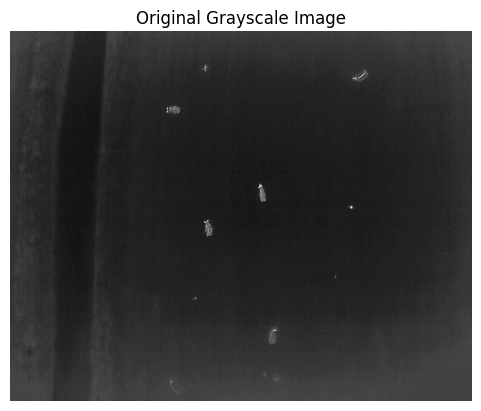

In [2]:
# Load the image
image = cv2.imread('../dataset/images/DJI_20240125160538_0008_T.JPG')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display original grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

### Vignette Correction

The orinal image are more clear in the center than the outside, this likely caused by the camera lens. This is called a vignette.
To remove uneven lighting or dark corners (vignetting), we blur the image to estimate the background and subtract it from the original.

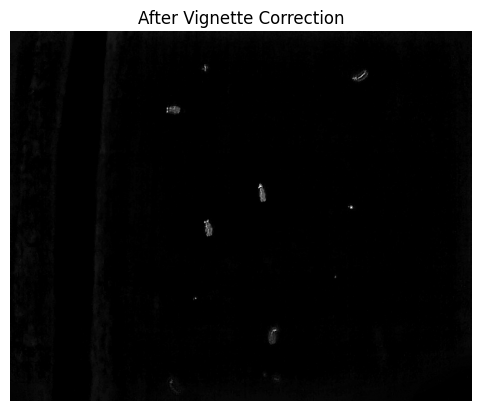

In [3]:
background = cv2.GaussianBlur(gray, (201, 201), 0)
corrected = cv2.subtract(gray, background)
corrected_image = cv2.normalize(corrected, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(corrected_image, cmap='gray')
plt.title('After Vignette Correction')
plt.axis('off')
plt.show()

As you can see the images are now mutch more clear.

### Denoising

The image can still have some noise this can be caused my removing the vignette so first we need to do a correction.

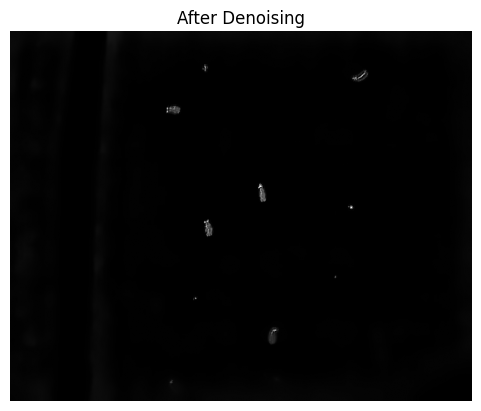

In [4]:
denoised = cv2.fastNlMeansDenoising(corrected_image, h=10)

plt.imshow(denoised, cmap='gray')
plt.title('After Denoising')
plt.axis('off')
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)
To boost local contrast and make subtle features (like small sheep blobs) more visible without overexposing the image.

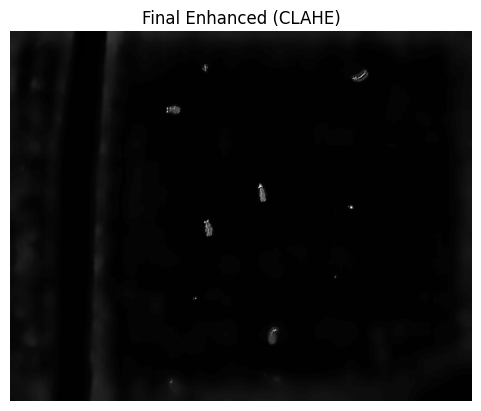

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(denoised)

plt.imshow(clahe_img, cmap='gray')
plt.title('Final Enhanced (CLAHE)')
plt.axis('off')
plt.show()